# Atividade 1 - Aprendizado de Máquina: modelos descritivos

**Professor: Sérgio Nery Simões**\
**Alunos:**
- Sandro Ricardo De Souza
- Leonardo Cruz de Andrade

**Data:26/03/2025**

A atividade consiste em replicar o notebooks neste [link](https://colab.research.google.com/drive/1vFRy6g0JPImsri8pItFqXypIU41uI-Bn#scrollTo=8XYcBbN3eI4v), executando cada célula, interpretando e explicando cada saída. Concluir sugerindo aplicações das metodologias aplicadas aqui na Secretaria de Educação do Espírito Santo.  



# Modelo de segmentação de clientes

Este notebook contém um exercício de clustering usado para praticar a interpretação de modelos de dados agrupados. A parte mais difícil de criar um modelo de clustering geralmente é entender os resultados que ele produz, pois não se tem uma variável de destino com a qual possa comparar seus resultados.

Portanto, a interpretação pode se tornar bastante complexa e, portanto, exploramos algumas alternativas para entender seus clusters depois de treinar seu modelo. Abaixo estão as etapas executadas para limpar os dados, explorá-los e, finalmente, ajustá-los a um modelo de agrupamento K-Means e interpretar os resultados.

A parte mais importante deste exercício é a interpretação do agrupamento, pois devemos estar cientes de que o objetivo final é fornecer insights de negócios por meio dos resultados.

## Importando módulos

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Lendo base de dados

In [68]:
path_file = r'../../datasets/segmentation_data.csv'
customer_info = pd.read_csv(path_file)
customer_info.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1853,100001854,0,0,33,0,113619,1,0
1946,100001947,0,0,40,1,76881,0,0
1314,100001315,1,1,23,1,94324,1,1
18,100000019,1,1,44,2,261952,2,2
1610,100001611,1,1,25,1,103651,0,0


In [134]:
# Alternativa

import kagglehub

# Download latest version
path = kagglehub.dataset_download("dev0914sharma/customer-clustering")

print("Path to dataset files:", path)

#customer_info = pd.read_csv('../../datasets/segmentation_data.csv')
customer_info = pd.read_csv(path + r'/segmentation data.csv')
customer_info.sample(5)

Path to dataset files: /home/sandro/.cache/kagglehub/datasets/dev0914sharma/customer-clustering/versions/1


In [69]:
customer_info.shape

(2000, 8)

## Dicionário de dados

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

O dataset contém 2.000 registros e 8 colunas, sem valores nulos.

**Variáveis Numéricas:**
- ID (identificador único).
- Age (idade).
- Income (renda anual).

**Variáveis Categóricas:**
- Sex (0 = masculino, 1 = feminino).
- Marital status (0 = solteiro, 1 = casado/não solteiro).
- Education (0 = sem educação, 1 = ensino médio, 2 = universidade, 3 = pós-graduação).
- Occupation (0 = desempregado, 1 = empregado, 2 = gerente/autônomo).
- Settlement size (0 = cidade pequena, 1 = média, 2 = grande).

## Informações sobre o dataset

Análise estatística resumida dos dados. Verificação de valores nulos e estrutura geral dos dados, incluindo os tipos.

O método `.info()` para entender os tipos de dados em cada coluna. E o método `.describe()` para mostrar informações resumidas sobre as estatísticas regulares.

In [70]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [71]:
customer_info.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Melhorando a apresentação do `.describe`

In [72]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
customer_info[cat_columns] = customer_info[cat_columns].astype('str')
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


Na célua anterior, melhoramos a saída do describe para obtermos uma descrição mais acertiva. 

`num_columns = ['ID','Age','Income']`

criamos uma lista chamada num_columns contendo os nomes das colunas numéricas da base de dados. Essas colunas são:

- ID: identificador único do cliente (inteiro).
- Age: idade do cliente (inteiro).
- Income: renda anual do cliente (real).

`cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']`

criamos uma lista chamada `cat_columns` contendo os nomes das colunas categóricas. Essas colunas representam características como sexo, estado civil, nível de educação, ocupação e tamanho da cidade.

`customer_info[cat_columns] = customer_info[cat_columns].astype('str')`

Convertemos todas as colunas categóricas para o tipo string. Isso facilita a análise estatística com métodos como `.describe()`, pois o pandas trata strings como categorias de texto.

`customer_info.describe(include='object').T`

O método `.describe(include='object')` gera estatísticas descritivas apenas para colunas categóricas (strings). Ele retorna informações como:
- count: número de valores não nulos.
- unique: quantidade de categorias distintas.
- top: categoria mais frequente.
- freq: frequência da categoria mais comum.

Por fim, o `.T` (transposição) inverte linhas e colunas para uma visualização mais organizada.

## Valores faltantes

Podemos ver, pela saída do comando `.info()` que não há valores faltantes nos dados.

## Análise exploratória de dados

### Distribuição das variáveis numéricas

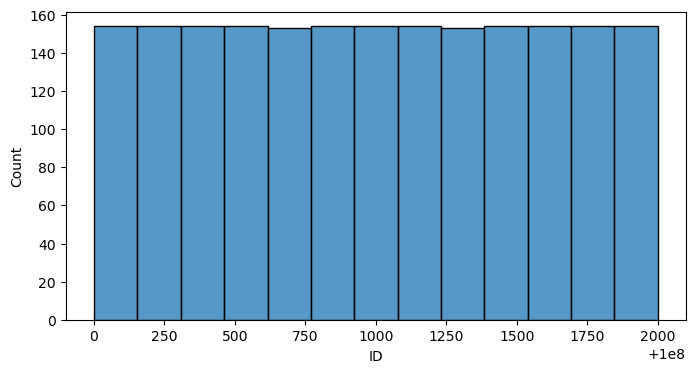

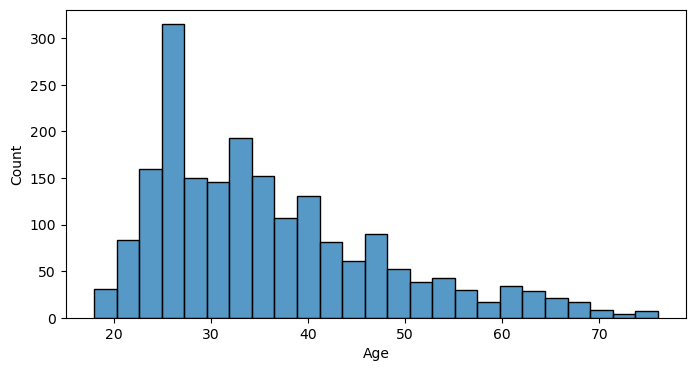

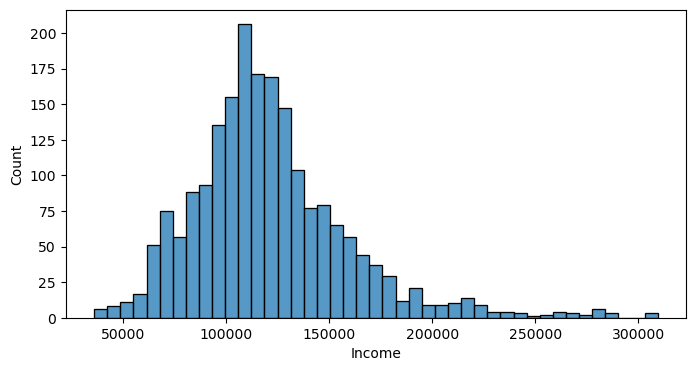

In [73]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)

### Distribuição das variáveis numéricas Idade, ID e Renda.

Notamos que `ID` tem uma distribuição uniforme, o que faz sentido, já que é um identificador do cliente e será descartado abaixo.
A variável `Idade` tem uma forte assimetria à direita, gerada por causa do limite inferior em zero da variável. Se estivermos usando o agrupamento K-Means, não haverá necessidade de normalizar o atributo, mas talvez tenhamos que fazer isso para outros modelos. A variável `Renda` tem o mesmo problema de assimetria à direita que 'Idade'. Teremos que ter cuidado com isso, dependendo do modelo que selecionarmos.

### Distribuição das variáveis categóricas

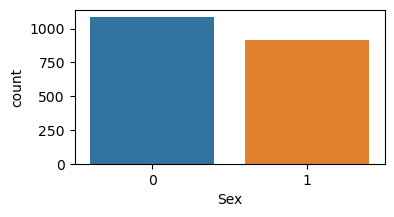

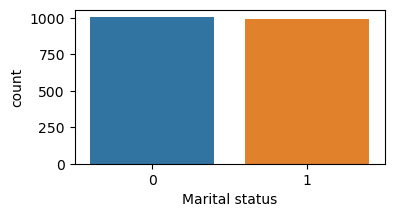

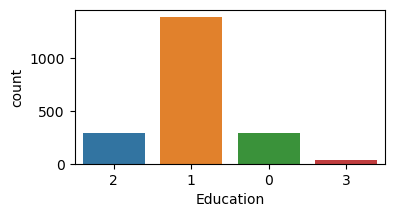

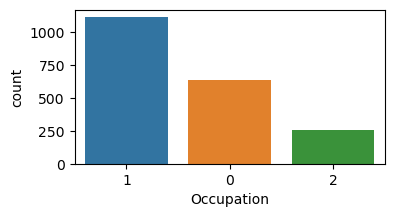

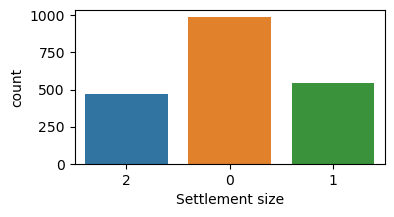

In [74]:
for category in cat_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=customer_info, x=category, hue=category)

A análise das variáveis categóricas revelou que os gêneros e o estado civil dos clientes estão equilibrados. A maioria possui ensino médio, enquanto apenas 1,8% tem pós-graduação, sugerindo a fusão das categorias superiores em "universidade". Além disso, as categorias de ocupação e tamanho do assentamento apresentam uma distribuição adequada entre as opções.

### Análise bivariada
Uma análise bivariada é um tipo de análise estatística que examina a relação entre duas variáveis. O objetivo é entender se existe associação entre elas e como elas se comportam juntas. Dependendo do tipo de variáveis envolvidas (categóricas ou numéricas), diferentes técnicas podem ser utilizadas.

#### Características numéricas

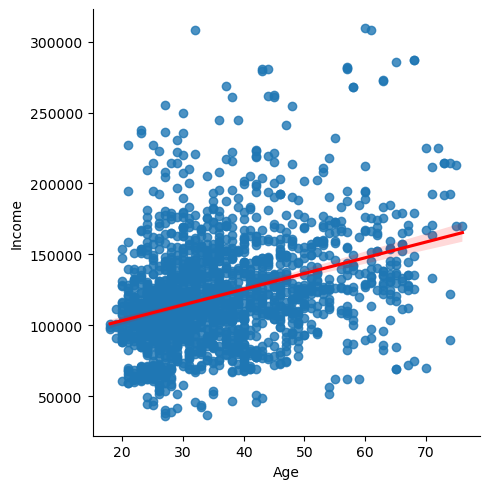

In [75]:
sns.lmplot(x='Age', y='Income',  line_kws={'color': 'red'},  data=customer_info)

Há uma pequena correlação entre as características Idade e Renda. Percebemos que a inclinação da linha é muito pequena, o que mostra que a correlação entre as características é baixa.

In [76]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


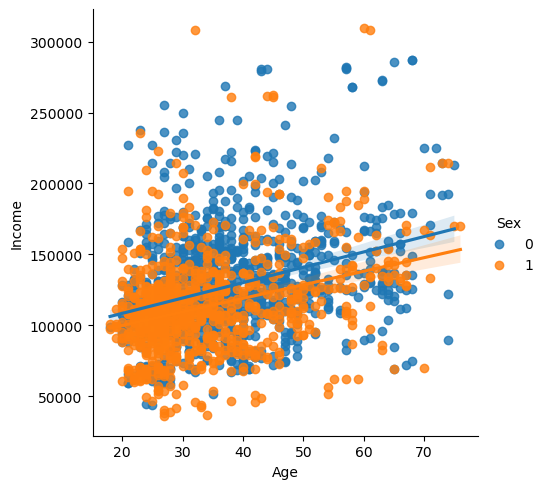

In [77]:
sns.lmplot(x='Age', y='Income', hue='Sex', data=customer_info)

Podemos ver o cálculo do fator de correlação de Pearson, que mostra que os valores têm uma pequena correlação entre eles. Plotando os dados segmentados por gênero, a correlação se mantem para ambos

#### Comparação entre variáveis categóricas e numéricas

In [78]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

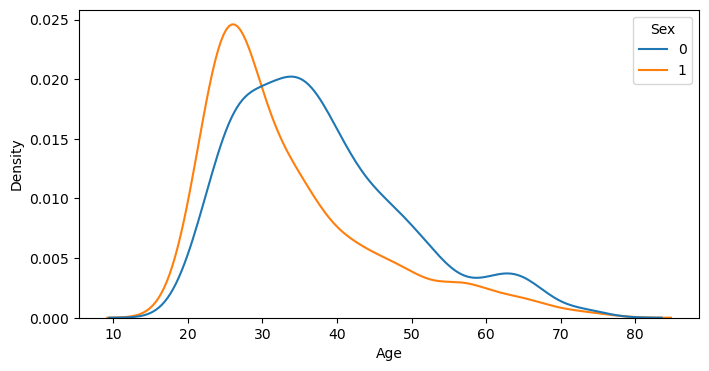

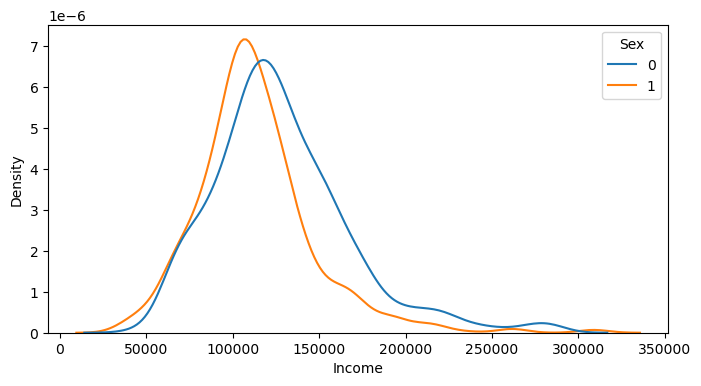

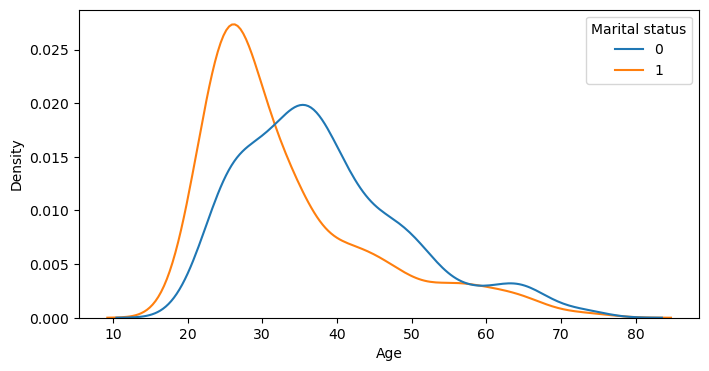

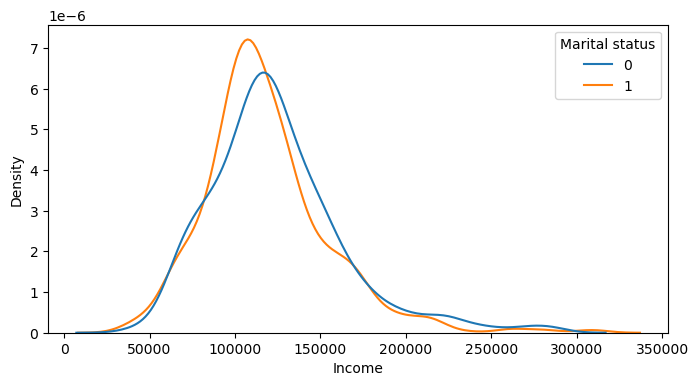

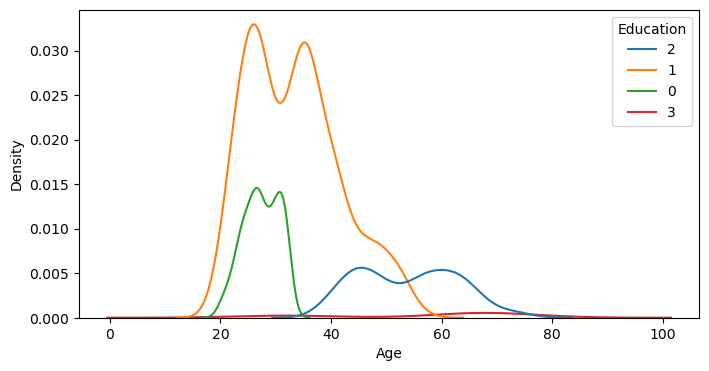

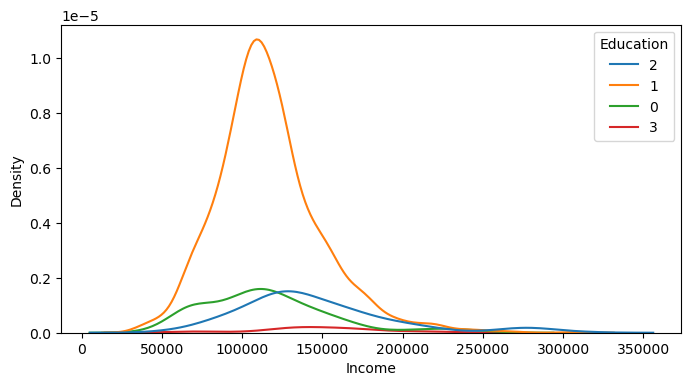

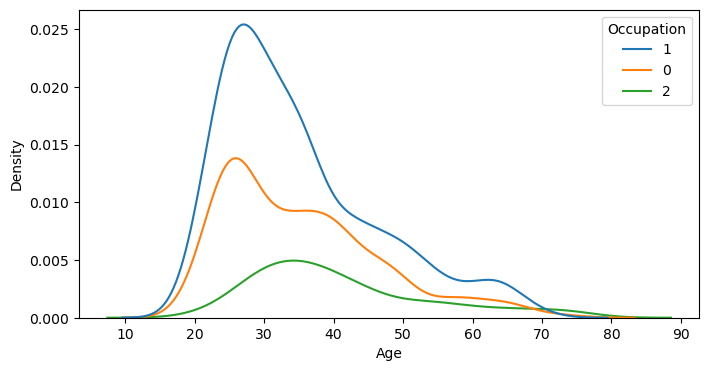

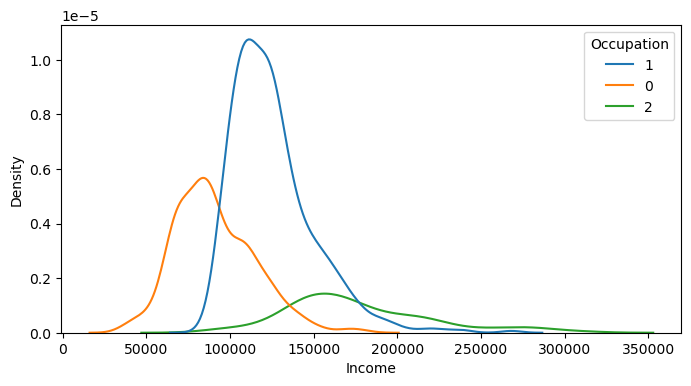

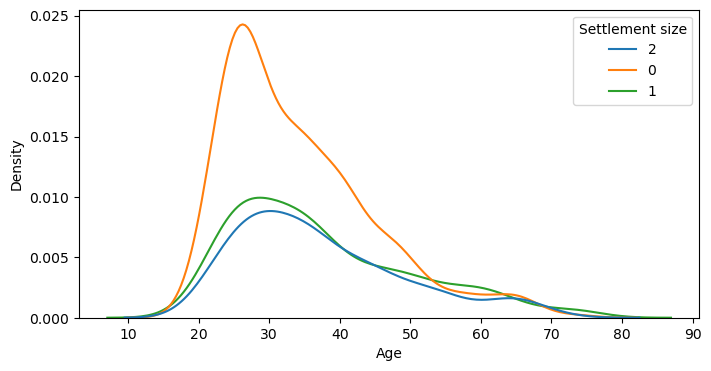

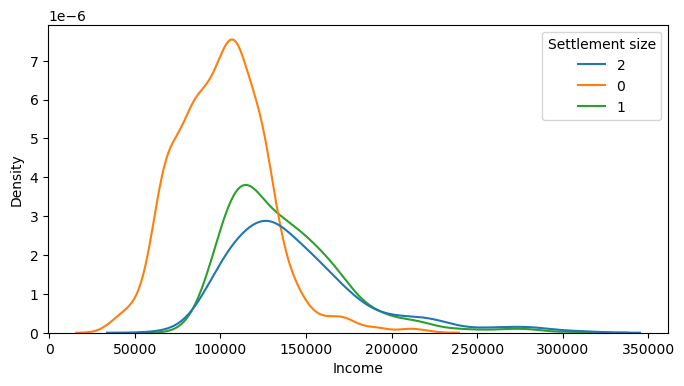

In [79]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

#### Análise dos gráficos de densidade
Os gráficos de densidade revelam algumas tendências importantes

1. Idade por categoria:
   - Pessoas casadas tendem a ser mais velhas do que as solteiras.
   - O nível educacional apresenta uma variação interessante com a idade: pessoas com maior educação tendem a estar em faixas etárias intermediárias.
   - Desempregados (ocupação = 0) tendem a estar distribuídos em faixas etárias mais altas e mais baixas, possivelmente jovens sem emprego fixo e aposentados.
2. Renda por categoria:
   - Homens parecem ter uma distribuição de renda mais elevada em relação às mulheres.
   - Pessoas casadas possuem uma distribuição de renda mais ampla, indicando maior variação.
   - O nível educacional tem uma forte correlação com a renda: níveis mais altos de educação tendem a gerar maior renda.
   - A ocupação impacta fortemente a renda, com os desempregados concentrados em faixas de menor rendimento.

#### Relação entre variáveis categóricas

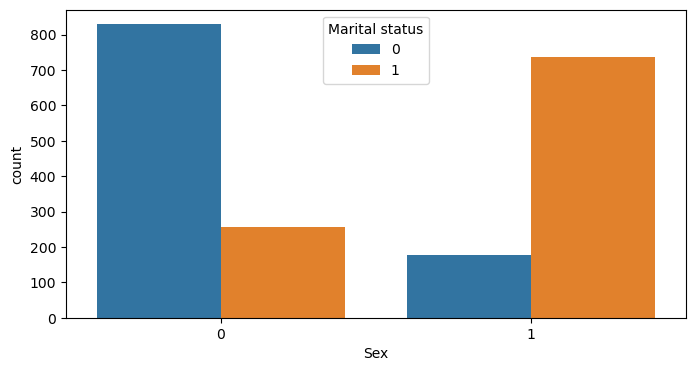

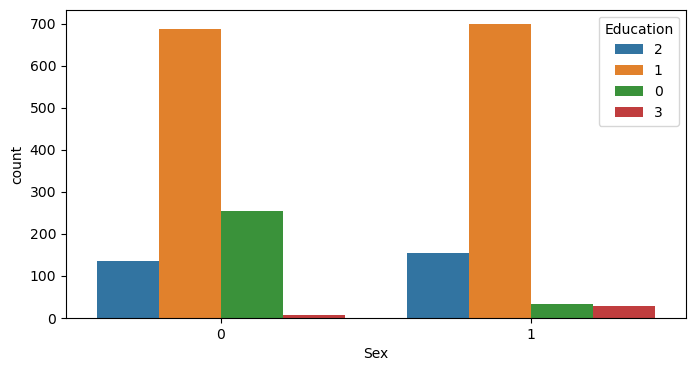

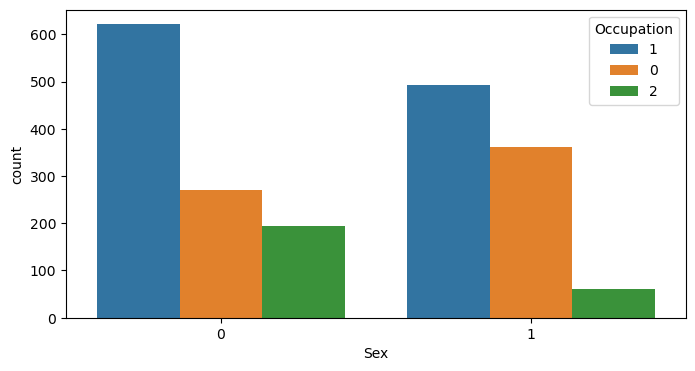

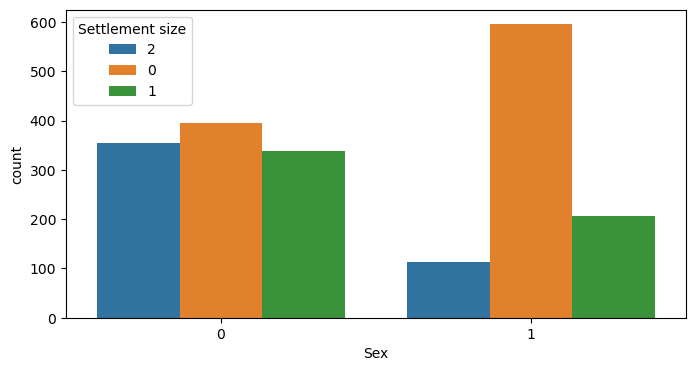

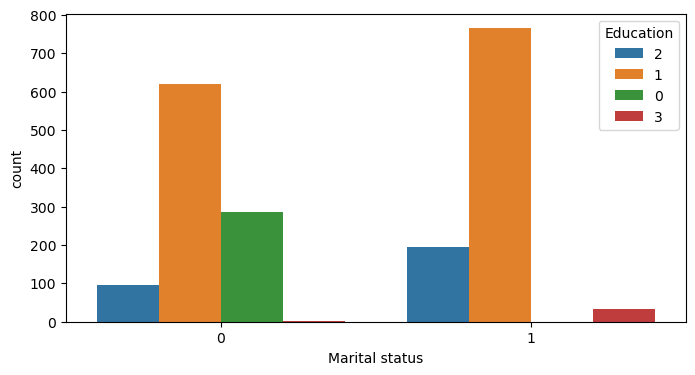

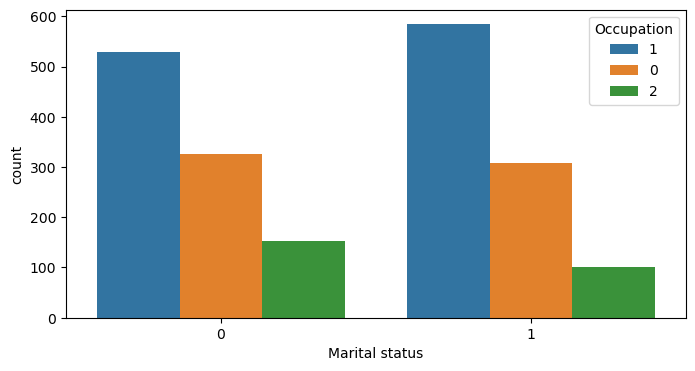

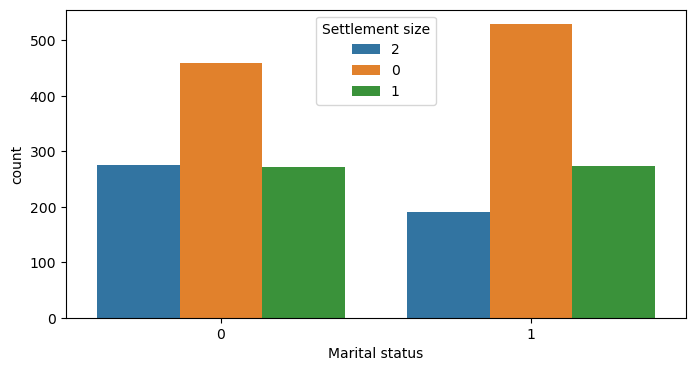

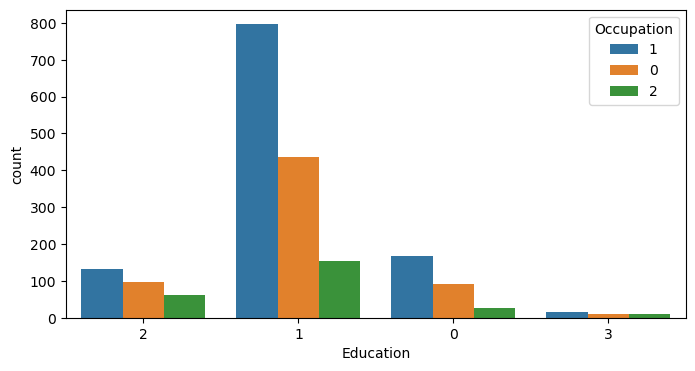

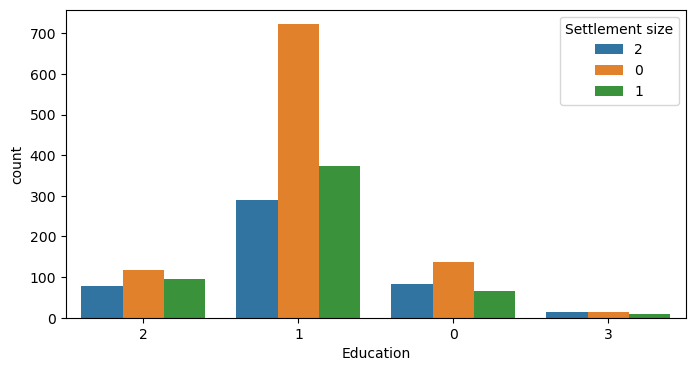

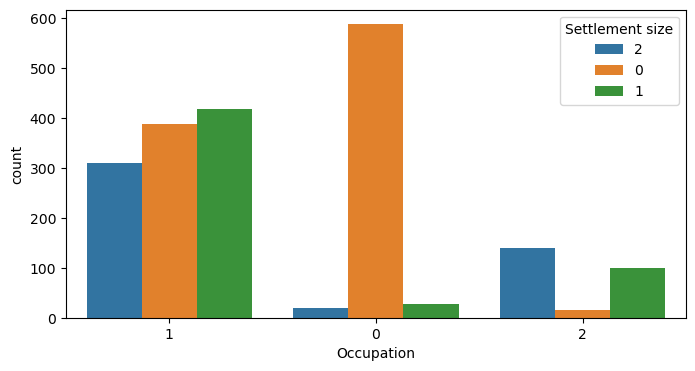

In [80]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

#### Análise dos gráficos de barra 
Os gráficos de contagem mostram algumas relações interessantes entre variáveis categóricas:

1. Sexo e Estado Civil:
    - Mulheres tendem a ser casadas com mais frequência do que homens.
    - Homens aparecem mais frequentemente na categoria de solteiros.
2. Estado Civil e Educação:
    - Pessoas casadas possuem uma maior concentração nos níveis médio e superior de educação.
3. Estado Civil e Tamanho da Cidade:
    - Pessoas casadas são mais comuns em cidades menores, enquanto solteiros são mais frequentes em áreas urbanas maiores.
4. Ocupação e Sexo:
    - Homens tendem a ser empregados com mais frequência do que mulheres.
    - Mulheres possuem uma maior proporção de desempregadas em comparação aos homens.

### Análise Multivariada
A análise multivariada é um conjunto de técnicas estatísticas utilizadas para examinar simultaneamente múltiplas variáveis e suas relações. Diferente da análise univariada, que estuda cada variável isoladamente, e da análise bivariada, que avalia a relação entre duas variáveis, a análise multivariada busca entender padrões mais complexos, considerando a interação entre três ou mais variáveis ao mesmo tempo.

In [81]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

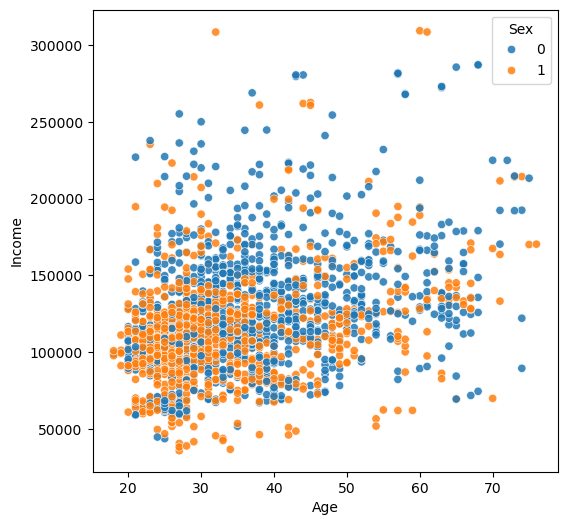

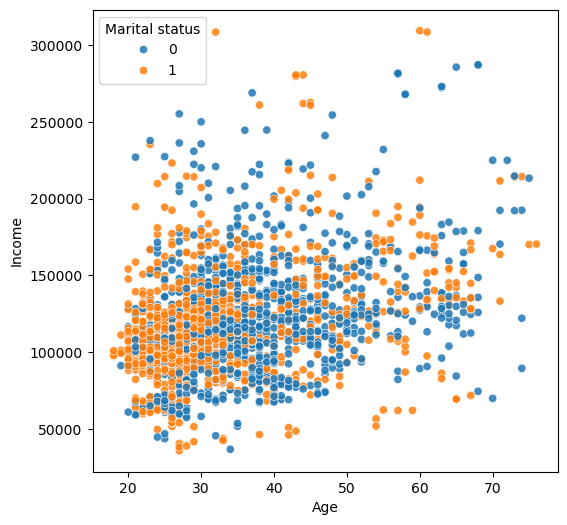

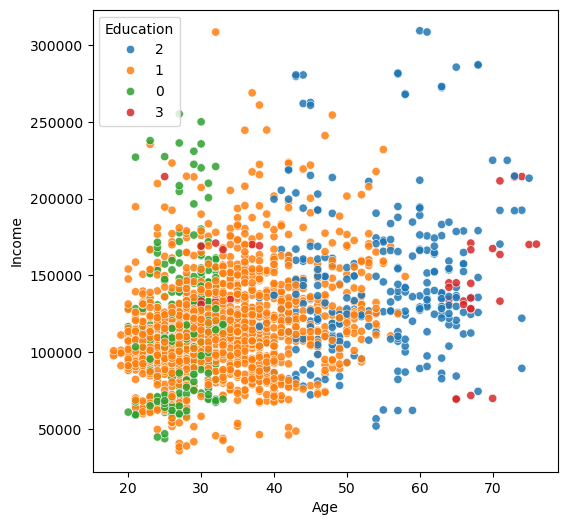

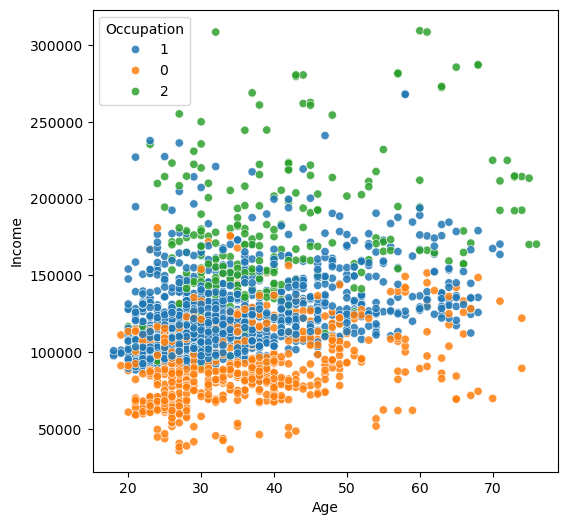

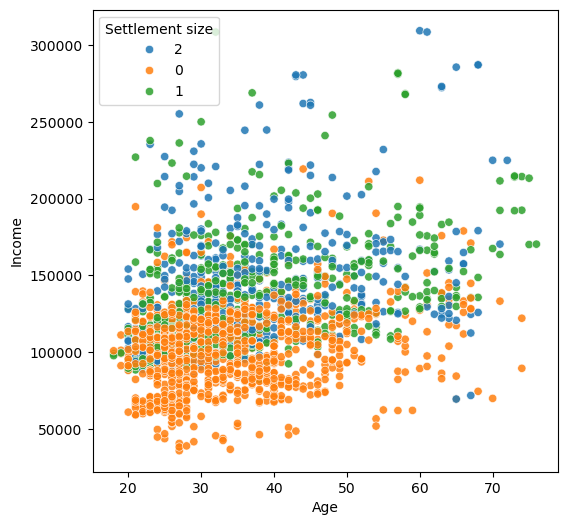

In [82]:
for cat in cat_columns:
    bivariate_scatter('Age', 'Income', cat, customer_info)

#### Análise dos Gráficos de Dispersão (Multivariada)
Os gráficos mostram a relação entre Idade e Renda, segmentada por diferentes variáveis categóricas:

1. Sexo:
   - Não há uma diferença significativa na distribuição de renda entre homens e mulheres.
   - Parece haver uma maior dispersão nos dados para ambos os sexos, indicando que a renda não depende fortemente do gênero.
2. Estado Civil:
    - Pessoas casadas parecem ter uma renda um pouco mais distribuída em faixas mais altas em relação aos solteiros.
    - Pode indicar que o casamento está correlacionado com maior estabilidade financeira.
3. Educação:
   - Níveis educacionais mais altos tendem a estar associados a maiores rendas.
   - Há uma maior concentração de pessoas com menor renda nos níveis de educação mais baixos.
4. Ocupação:
   - Pessoas desempregadas tendem a ter uma renda mais baixa, conforme esperado.
   - A relação entre idade e renda é mais evidente para pessoas empregadas.
5. Tamanho do Assentamento (Cidade):
   - Pessoas que vivem em cidades maiores parecem ter uma maior distribuição de renda.
   - Em cidades pequenas, a renda está mais concentrada em faixas mais baixas.

### Conclusão da Análise Bivariada e Multivarida

A análise dos dados revelou diversos padrões e relações entre as variáveis investigadas. A partir da **análise bivariada**, observou-se uma leve predominância masculina na amostra e uma distribuição equilibrada entre casados e não casados. Além disso, verificou-se que a maioria dos clientes vive em cidades pequenas e está empregada. A educação apresentou influência significativa, sendo que poucos clientes possuem pós-graduação, o que sugere a possibilidade de agrupar categorias educacionais superiores. Além disso, constatou-se que indivíduos desempregados tendem a residir em cidades menores, e que há um possível viés de gênero, pois homens são empregados com maior frequência, enquanto mulheres são mais frequentemente desempregadas.  

Já na **análise multivariada**, explorando a relação entre idade e renda segmentada por variáveis categóricas, foi possível verificar que a educação e a ocupação são os fatores mais determinantes para a renda. Pessoas com maior escolaridade tendem a apresentar rendas mais elevadas, e a relação entre idade e renda se torna mais evidente para indivíduos empregados. O estado civil também se mostrou relevante, pois indivíduos casados possuem maior distribuição de renda em faixas superiores, o que pode indicar uma associação com maior estabilidade financeira. O tamanho do assentamento reforçou a influência no acesso a oportunidades, já que moradores de cidades grandes possuem uma distribuição de renda mais ampla, enquanto aqueles que vivem em cidades menores apresentam maior concentração de rendas baixas.  

Em síntese, enquanto a análise bivariada destacou padrões gerais de distribuição demográfica, emprego e educação, a análise multivariada aprofundou a compreensão sobre os determinantes da renda e as interações entre idade, ocupação e estado civil. Os resultados indicam que fatores socioeconômicos e geográficos desempenham um papel fundamental na segmentação dos clientes e suas condições financeiras.

### Transformação e dimensionamento de atributos

#### Teste de normalidade para os dados

Os atributos numéricos mostraram uma inclinação à direita em suas distribuições. Verificaremos se os dados são distribuídos normalmente ou não, usando um teste de normalidade do scipy. A partir de algumas visualizações anteriores, já podemos supor que os dados não são distribuídos normalmente, mas executamos o teste para ter evidências disso precisamente.

In [83]:
normaltest_result_income = stats.normaltest(customer_info['Income'])[1]
normaltest_result_age    = stats.normaltest(customer_info['Age'])[1]

print(f'O valor p para a hipótese nula de que a renda é distribuída normalmente é {normaltest_result_income}')
print(f'O valor p para a hipótese nula de que a idade é distribuída normalmente é {normaltest_result_age}')

O valor p para a hipótese nula de que a renda é distribuída normalmente é 2.5009638879187734e-98
O valor p para a hipótese nula de que a idade é distribuída normalmente é 3.3428344869999675e-56


##### Análise do teste de normalidade

Os resultados do teste de normalidade indicam que tanto a variável Income (Renda) quanto Age (Idade) não seguem uma distribuição normal. Os valores de p-value obtidos foram extremamente baixos:

- Income: $2.5 \times 10^{-98}$ 
- Age: $3.34 \times 10^{-56}$

O critério usual para rejeitar a hipótese nula ($H_0$), que assume que os dados seguem uma distribuição normal, é $\text{p-value} < 0.05$. Como os valores obtidos são muito menores do que $0.05$, podemos rejeitar com extrema certeza a hipótese de normalidade para ambas as variáveis.

##### Implicações
Os dados não seguem uma distribuição normal – Isso significa que estatísticas como a média e o desvio padrão podem não ser representativas, e testes estatísticos que assumem normalidade podem não ser apropriados.

Transformação dos dados – Para utilizar modelos estatísticos e de aprendizado de máquina que assumem normalidade, como K-Means Clustering, é necessário normalizar os dados antes de utilizá-los no modelo. Técnicas comuns incluem:

- Transformação logarítmica (Log-Transform) para lidar com distribuições enviesadas positivamente.
- Transformação de Box-Cox ou Yeo-Johnson, que são métodos mais gerais para tornar os dados mais próximos da normalidade.
- Padronização (Z-score), que transforma os dados para terem média 0 e desvio padrão 1, facilitando a aplicação de algoritmos de machine learning.

Dessa forma, antes de aplicar técnicas como K-Means, é fundamental realizar uma transformação nos dados e verificar novamente sua distribuição para garantir que atendam aos requisitos do modelo.

#### Ciclo de transformação

Abaixo, examinaremos o mesmo ciclo repetidamente até atingirmos uma distribuição razoável o suficiente. Para isso, criamos uma função que aplica uma transformação nos dados, ajustando seus parâmetros e, em seguida, transformando cada valor em uma distribuição mais recente. Testaremos um log e um PowerTransform, pois os dados parecem ter uma forte distorção para a direita, especialmente o recurso Income.

### Atributo: Renda
#### Transformação de Log

In [84]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

Após executar o teste, notamos que os dados ainda não estão distribuídos normalmente, então a transformação de log não conseguiu levá-los a uma distribuição normal completa. Agora testaremos o PowerTransformer do scikit learn para ver se alcançamos melhores resultados.

#### PowerTransformer
É uma família de transformações paramétricas e monotônicas que são aplicadas para tornar os dados mais parecidos com Gaussianos. Isso é útil para modelar problemas relacionados à heterocedasticidade (variância não constante) ou outras situações em que a normalidade é desejada. Atualmente, o PowerTransformer suporta a transformada Box-Cox e a transformada Yeo-Johnson. O parâmetro ótimo para estabilizar a variância e minimizar a assimetria é estimado por meio da máxima verossimilhança. O Box-Cox exige que os dados de entrada sejam estritamente positivos, enquanto o Yeo-Johnson aceita dados positivos ou negativos. Por padrão, a normalização de média zero e variância unitária é aplicada aos dados transformados.

In [85]:
from sklearn.preprocessing import PowerTransformer

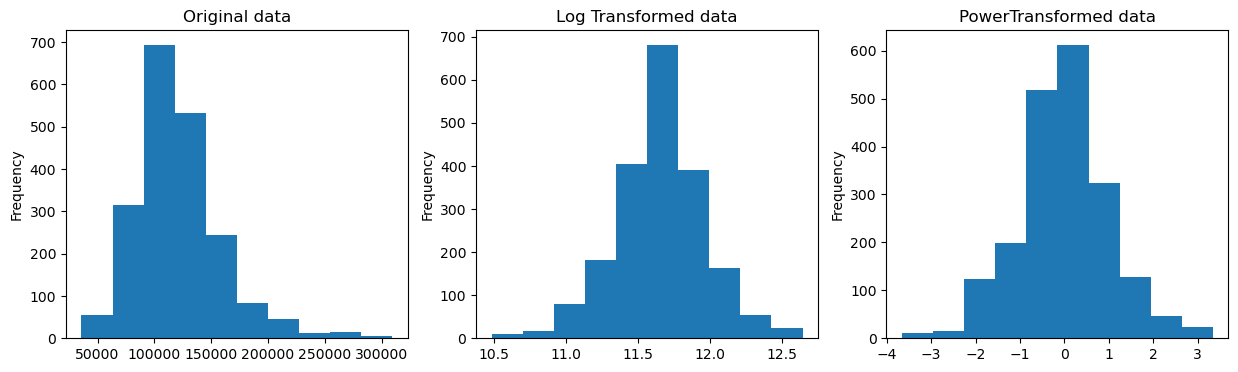

In [86]:
# PowerTransform data
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [87]:
normality_test(log_transformed_income)

NormaltestResult(statistic=32.357037046565075, pvalue=9.41366371618838e-08)

In [88]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


O **PowerTransformer** é uma técnica de transformação que busca tornar os dados mais próximos de uma distribuição normal, estabilizando a variância e reduzindo a assimetria. Ele suporta duas abordagens: **Box-Cox**, que exige valores positivos, e **Yeo-Johnson**, que pode ser aplicado a qualquer conjunto de dados. Além disso, a transformação ajusta os dados para média zero e variância unitária, o que pode ser essencial para modelos que assumem normalidade, como **K-Means Clustering**.  

A análise de normalidade dos dados de renda (**Income**) antes da transformação indicou uma forte **não normalidade** ($\text{p-value} ≈ 10^{-98}$), o que levou à aplicação de duas técnicas: **transformação logarítmica** e **PowerTransformer**. Ambas reduziram a assimetria e melhoraram a distribuição, mas os testes de normalidade ainda retornaram valores de p muito baixos ($ ≈ 10^{-8}$ para $\log$ e $10^{-7}$ para **PowerTransformer**), indicando que os dados ainda não seguem perfeitamente uma distribuição normal. Apesar da melhora, pode ser necessário testar outras técnicas, como **padronização (Z-score)**, ou optar por métodos estatísticos que não exigem normalidade.

### Atributo: Age

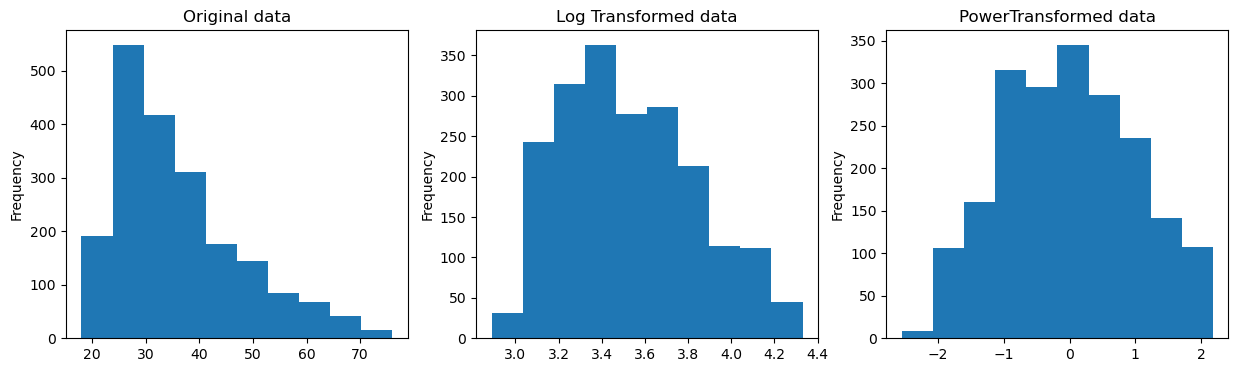

In [89]:
# PowerTransform data
feature2 = customer_info['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [90]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


A variável **Age** (idade) passou por um processo semelhante ao aplicado à variável **Income**, com o objetivo de aproximar seus valores de uma distribuição normal. Inicialmente, o teste de normalidade indicou uma forte **não normalidade** ($p$-value $\approx 3.34 \times 10^{-56}$), confirmando que os dados não seguem uma distribuição normal. Para mitigar esse problema, foram aplicadas duas transformações: **logarítmica** e **PowerTransformer**.  

Os resultados mostram que ambas as transformações reduziram a estatística de teste, indicando uma melhora na distribuição, mas os $p$-values ainda permanecem extremamente baixos ($7.52 \times 10^{-25}$ para log e $9.92 \times 10^{-36}$ para PowerTransformer). Isso sugere que, embora as transformações tenham ajudado a suavizar a distribuição, a normalidade ainda não foi alcançada. Assim, pode ser necessário explorar outras abordagens, como **padronização (Z-score), transformações não lineares mais sofisticadas ou até modelos que não assumem normalidade nos dados**.

### Transformações de características definitivas:
Adicionamos os resultados da seção anterior para nosso DataFrame customer_info. Renomeamos o DataFrame transformado final que contém os atributos finais para usar no modelo. Descartamos as variáveis que não entrarão no modelo, que são 'Income', 'Age' e 'ID'.

In [91]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [92]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


#### Escala de atributos (MinMaxScaler)

Como há atributos categóricos escalados entre 0 e 1 (recurso 'Sexo'), usaremos o MinMaxScaler do scikit learn para escalar dados entre 0 e 1. Isso é feito para que a escala seja equivalente à do atributo 'Sexo' (todos os valores estarão entre zero e um). Isso é importante para o modelo de agrupamento K-Means, pois ele usa a distância como uma medida de similaridade. Portanto, se não escalarmos os atributos, não obteremos clusters precisos.

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

In [95]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651051, 0.91249369])

# Modelos de Clusterização

## Clusterização K-Means

K-Means é um algoritmo de clusterização baseado na distância para determinar a similaridade de diferentes pontos. Ele cria clusters atribuindo pontos ao cluster mais próximo deles.

### Selecionando o número correto de clusters

Existem várias maneiras de selecionar o número correto de clusters, mas todas elas são baseadas na quantidade de insights de negócios que obtemos de cada cluster. Não é útil encontrar muitos clusters se não podemos interpretá-los ou não ganhar nada separando-os em diferentes categorias. O número de clusters é uma entrada para o modelo, mas não podemos determinar o número de clusters de antemão. Portanto, uma boa aproximação é usar o método elbow e selecionar o número de grupos que reduz uma métrica a uma quantidade considerável; mais não adicionaria muita informação e menos significaria que a métrica ainda poderia ser melhorada significativamente.

#### Método Elbow (cotovelo)

In [96]:
from sklearn.cluster import KMeans

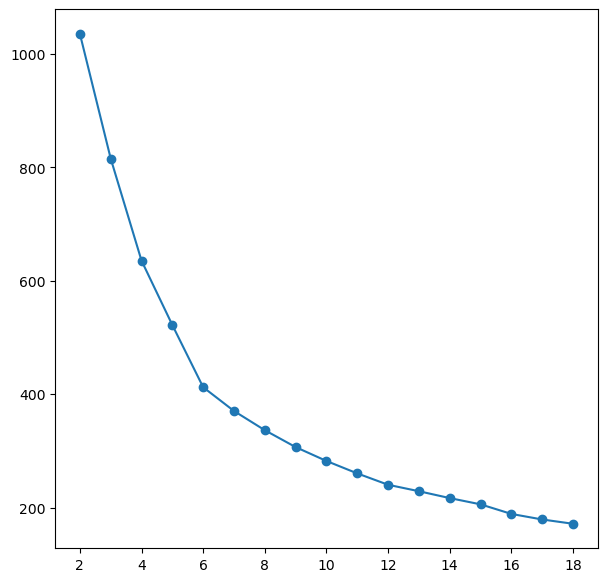

In [97]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, n_init=10, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

Ao executar o loop mostrado acima, notamos que o cotovelo acontece em torno de 6-7 clusters, o que seria uma boa aproximação. A curva não é muito clara e você também pode dizer que 12 é um bom número, mas você deve entender que 12 clusters geralmente são demais, então preferimos perder algumas informações sobre os grupos aos quais nossos clientes pertencem, do que ganhar mais precisão no clustering usado.

Embora tenhamos um resultado um tanto convincente acima, usaremos as pontuações do Silhouette para ver se podemos obter mais insights sobre quantos clusters devemos usar. Veja o procedimento abaixo:

**Silhouette scores:**

O **Silhouette Score** é uma métrica utilizada para avaliar a qualidade de agrupamentos em algoritmos de **clusterização**, como **K-Means, DBSCAN e Agglomerative Clustering**. Ele mede o quão bem os pontos estão agrupados e quão distintos estão os diferentes clusters.  

**Definição Matemática**

Matematicamente, o **Silhouette Score** de um ponto de dado \( i \) é definido como:  

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Onde:  
- \( a(i) \) é a **distância média intra-cluster**, ou seja, a distância média entre o ponto \( i \) e todos os outros pontos do mesmo cluster.  
- \( b(i) \) é a **distância média inter-cluster**, isto é, a menor distância média entre o ponto \( i \) e todos os pontos do cluster mais próximo (ao qual ele **não** pertence).  

**Interpretação**

O valor de \( S(i) \) varia entre **-1 e 1**:  
- **Próximo de 1** → O ponto está bem agrupado e distante de outros clusters (**bom agrupamento**).  
- **Próximo de 0** → O ponto está na fronteira entre dois clusters (**sobreposição**).  
- **Próximo de -1** → O ponto pode ter sido agrupado incorretamente (**má clusterização**).  

O **Silhouette Score médio** de um conjunto de dados fornece um indicador geral da qualidade da clusterização.  
- Um valor **alto** sugere que os clusters são bem definidos.  
- Um valor **baixo** pode indicar sobreposição ou agrupamento inadequado.  


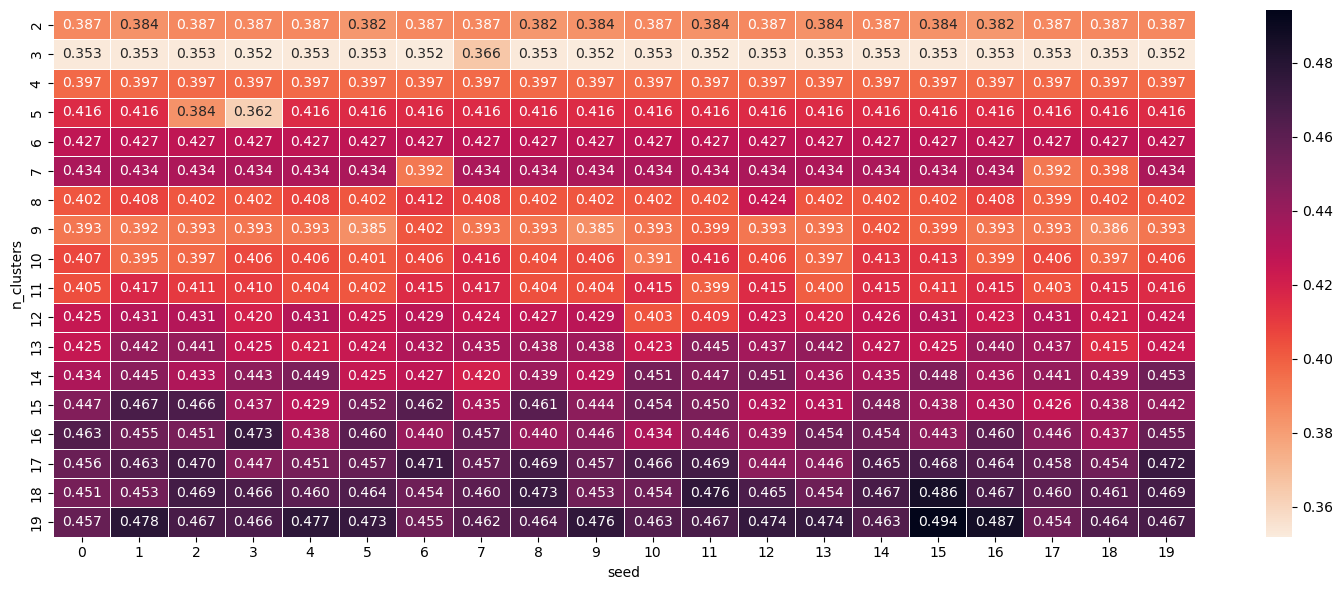

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, n_init=10, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

**Interpretanto o gráfico heatmap da saída**
A interpretação do **heatmap** gerado pelo código envolve a análise da **pontuação do Silhouette Score** em diferentes valores de **\( k \) (número de clusters)** e **semente aleatória (seed)** no algoritmo **K-Means**.

**1. Estrutura do Gráfico**
- O **eixo vertical (y-axis)** representa o número de **clusters** \( k \), variando de **2 a 19**.
- O **eixo horizontal (x-axis)** representa a **semente aleatória** usada para inicializar o K-Means, variando de **0 a 19**.
- Cada célula contém um **Silhouette Score** e está colorida de acordo com seu valor, seguindo a escala de cores da barra lateral direita.

---

**2. O que o Silhouette Score indica?**
- O **Silhouette Score** varia de **-1 a 1**:
  - **Valores próximos de 1** indicam que os clusters estão bem separados e os pontos estão corretamente agrupados.
  - **Valores próximos de 0** indicam que os clusters estão se sobrepondo e os pontos estão próximos das fronteiras entre grupos.
  - **Valores negativos** (que não aparecem aqui) indicariam que os pontos foram agrupados incorretamente.

---

**3. Padrões e Observações no Gráfico**
- **Picos de Silhouette Score**: O gráfico mostra que **\( k = 7 \)** tem alguns dos maiores valores de Silhouette Score, indicando uma boa separação dos clusters.
- **Clusters muito pequenos (\( k = 2 \) ou \( k = 3 \)) apresentam valores mais baixos**, o que sugere que esses agrupamentos não capturam bem a estrutura dos dados.
- **Clusters muito grandes (\( k > 14 \)) começam a ter Silhouette Scores menores**, o que significa que os grupos estão ficando fragmentados e menos distintos.
- **Variabilidade por seed**: Embora existam algumas variações devido à aleatoriedade da inicialização do K-Means, os padrões gerais se mantêm.

---

**4. Decisão sobre o Número de Clusters**
- Como há um **pico no Silhouette Score para \( k = 7 \)**, ele parece ser um número ideal de clusters.
- **\( k = 6 \) também apresenta bons valores**, o que o torna uma alternativa viável.
- Mais de **14 clusters** pode ser excessivo, tornando a análise mais difícil de interpretar.

Diante disso, a melhor abordagem seria testar **6 e 7 clusters** e analisar qualitativamente os resultados para tomar a decisão final. 🚀

**Análise do Silhouette Score para Seleção do Número Ótimo de Clusters**  

**Interpretação dos Resultados**  

- O gráfico revela um **pico na pontuação do Silhouette para \( k = 7 \) clusters**, sugerindo que esse pode ser um número apropriado de grupos.  
- Esse resultado está alinhado com a análise feita pelo **método do cotovelo**, reforçando a ideia de que **6 ou 7 clusters são as escolhas mais adequadas**.  
- Notamos que, conforme o número de clusters aumenta, o **Silhouette Score** tende a diminuir**, indicando que os grupos se tornam menos distintos e mais fragmentados.  
- Embora valores maiores, como **\( k = 14 \)**, apresentem boas pontuações, **a interpretação se tornaria complexa**, dada a limitação da quantidade de recursos disponíveis no conjunto de dados.  

**Decisão e Próximos Passos**  

Diante desses resultados, decidimos testar modelos com **6 e 7 clusters**. Para selecionar a melhor configuração, utilizaremos:  

1. **Entendimento de negócio**: Verificaremos qual agrupamento faz mais sentido na segmentação dos clientes.  
2. **Validação qualitativa**: Analisaremos a coerência dos grupos gerados e se refletem padrões esperados no conjunto de dados.  

Outra alternativa seria explorar modelos com mais clusters, mas isso **não seria prático** dada a escala do dataset e a necessidade de manter os insights interpretáveis.  

**Reexecutando os modelos para 6 e 7 clusters:**

Abaixo, criamos os modelos para 6 e 7 clusters usando K-Means e tentamos entender os resultados. Usaremos PCA para visualizar os dados e determinar se os clusters 6-7 que selecionamos fornecem boa coesão intercluster e separação de clusters. Caso contrário, executaremos novamente essa abordagem com um modelo baseado em densidade e veremos se obtemos melhores resultados.

#### Criando um conjunto de dados 3D com PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

- O **PCA (Principal Component Analysis)** reduz a dimensionalidade dos dados originais para **3 componentes principais** ($X_1, X_2, X_3$).
- Ele captura a **maior variância possível** dos dados e os representa em um novo espaço tridimensional.

In [101]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

#### Aplicando K-Means com 6 clusters e visualizando os resultados com decomposição PCA

In [102]:
kmeans=KMeans(n_clusters=6, n_init=10, random_state=0).fit(X)

Adicionamos os rótulos de cada linha ao DataFrame para que possamos tornar o processo de plotagem mais simples. Para lembrar que estamos falando de um resultado categórico nas colunas de rótulos, depois os converteremos para tipos de string.

In [103]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

- O algoritmo **K-Means** agrupa os dados em **6 clusters**.
- Os rótulos dos clusters são adicionados à base transformada com PCA.

In [104]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [105]:
X_pca_df.head()

,X1,X2,X3,Labels
0,-0.829143,0.350518,0.162403,5
1,0.531854,0.719504,0.230299,0
2,-0.489493,-0.693627,-0.175269,1
3,-0.712487,-0.027906,0.049583,5
4,-0.718334,-0.036815,0.052850,5


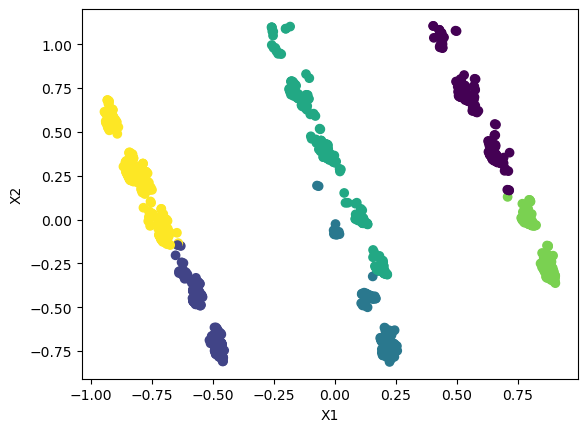

In [106]:
# @title X1 vs X2

import matplotlib.pyplot as plt
plt.scatter(X_pca_df['X1'], X_pca_df['X2'], c=X_pca_df['Labels'])
plt.xlabel('X1')
_ = plt.ylabel('X2')

- **Cada ponto representa uma amostra**, projetada no plano **(X1, X2)**.
- **A cor indica o cluster ao qual pertence**, baseado nos rótulos atribuídos pelo K-Means.
- **Objetivo**: Explorar a separação dos clusters em duas dimensões.

<Axes: xlabel='X1', ylabel='X2'>

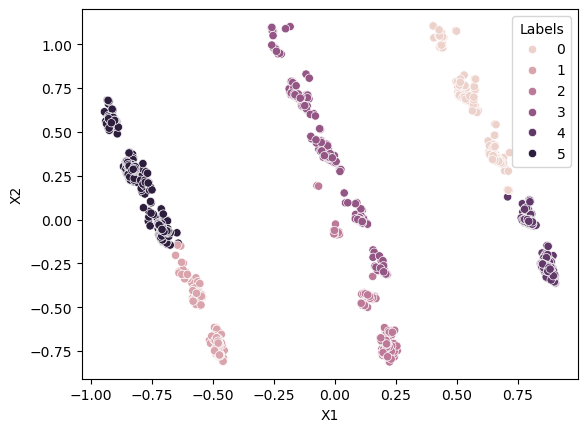

In [107]:
# @title X1 vs X2 colored by label

sns.scatterplot(data=X_pca_df, x="X1", y="X2", hue="Labels")

- Esse gráfico é semelhante ao anterior, mas usa **cores diferentes para os clusters**.
- O `hue="Labels"` garante que cada cluster tenha uma cor distinta.

In [108]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

#### Visualização

Já agrupamos os dados em 6 grupos distintos e fizemos PCA para obter 3 atributos dos 7 que tínhamos originalmente. É sempre importante lembrar que usar PCA significa inerentemente uma perda de informações, então as projeções dos dados nos novos recursos X1, X2 e X3 podem ter alguns pontos sobrepostos, mas, na realidade, ao usar o agrupamento K-Means, os pontos de borda são claramente definidos.

In [109]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

- **Gráfico tridimensional interativo**.
- Os eixos correspondem aos **três componentes principais** $X_1, X_2, X_3$.
- Cada cor representa um **cluster diferente**, facilitando a visualização da separação dos grupos.

Devemos primeiro notar que os clusters estão bem separados e o algoritmo parece estar fazendo bem a separação dos clusters, pois as fronteiras entre os clusters parecem bem claras.

Agora devemos criar um Results DataFrame que inclua os rótulos e aplicar métodos de filtragem para inferir informações sobre os clusters fornecidos pelo modelo K-Means. Nosso objetivo é definir que tipo de cliente é refletido em cada cluster!

In [110]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.3 KB


O código acima tem como função

**Remoção de colunas irrelevantes**
- A base de dados original, `customer_info`, contém diversas colunas.
- Aqui, estamos **removendo três colunas**:
  - `'ID'`: Provavelmente um identificador único (não relevante para análise).
  - `'transf_income'` e `'transf_age'`: Variáveis transformadas que podem ter sido usadas para normalização, mas agora não são mais necessárias.

**Adição dos rótulos dos clusters**
- Adiciona a **coluna `Labels`** ao `results_df`, que contém os rótulos de clusters gerados pelo algoritmo **K-Means**.

**Conversão dos tipos de dados**
- O método `.astype({...})` **converte** os tipos de algumas colunas para **`int32`**.
- Isso pode ser útil para economizar **memória**, já que `int32` ocupa **4 bytes**, enquanto `int64` ocupa **8 bytes**.

**Interpretação da saída do `info()`**

**Quantidade de dados**
- O dataset tem **2000 entradas (linhas)**.
- Todas as colunas têm **valores não nulos**, ou seja, **não há valores `NaN`**.

**Uso de memória**
- Como foi feita a conversão de `int64` para `int32` em algumas colunas, o consumo de memória do dataframe **ficou menor**.
- A memória usada é **78.2 KB**, o que é mais eficiente do que se todas as colunas fossem `int64`.

**Resumo**
- O código **remove colunas irrelevantes**.
- **Adiciona os rótulos de clusters** gerados pelo **K-Means**.
- **Reduz o uso de memória** ao converter `int64` para `int32` quando possível.
- A estrutura resultante tem **2000 linhas e 8 colunas**, sem valores nulos.

## Estatísticas resumidas de cada cluster

Agora vamos construir um programa que calcula estatísticas para os dados de cada rótulo. Nosso objetivo com isso é ter uma noção geral dos valores dentro de cada cluster, então precisamos de estatísticas de tendência central que olhem para todo o conjunto de dados em que estamos interessados, como a média, mediana, desvio padrão e assim por diante. O método .describe() faz exatamente isso para nós. Ele mostra a média e o desvio padrão, e a coluna 50% mostra a mediana dos dados.

In [111]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

Acima, criamos um dicionário chamado summary que contém todas as estatísticas de tendência central que queríamos saber. As estatísticas Min e Max nos dão uma ideia do intervalo dos dados, enquanto a média e a mediana nos dão a tendência central dos dados. Finalmente, o desvio padrão nos dá uma noção de variância dentro dos dados.

### Interpretando resultados

Agora, vamos tentar interpretar os resultados que obtivemos para cada cluster com a ajuda dessas estatísticas e nosso conhecimento geral dos dados. Lembre-se de que coletamos algumas informações sobre os dados durante a seção de visualização de dados que podem ser úteis aqui. Por exemplo, notamos que 'Idade' não era um bom indicador de separação dos clusters, pois os pontos de dados desse recurso dentro da mesma faixa etária pertenciam a categorias diferentes.

Usaremos **duas estratégias para interpretar os pontos de dados**. A primeira é usar as estatísticas descritivas resumidas do método **.describe()**. Isso nos dá uma boa ideia geral dos dados dentro de cada rótulo, mas também é incompleto, pois não temos uma ideia de distribuição. Portanto, usaremos o método **.hist()** para DataFrames para adicionar outra camada de profundidade em nossa análise com a distribuição dos dados.

Observe que os clusters não são analisados ​​em ordem, devido ao fato de que já conduzi uma análise rápida para dar sentido aos dados.

### Cluster 0

In [112]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,310.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,310.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,310.0,34.625806,13.263644,18.0,25.00,30.0,40.75,76.0
Education,310.0,1.341935,0.573850,1.0,1.00,1.0,2.00,3.0
Income,310.0,136594.083871,37859.666215,88800.0,108523.25,127525.5,155026.25,309364.0
Occupation,310.0,1.167742,0.422955,0.0,1.00,1.0,1.00,2.0
Settlement size,310.0,1.348387,0.510010,0.0,1.00,1.0,2.00,2.0
Labels,310.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


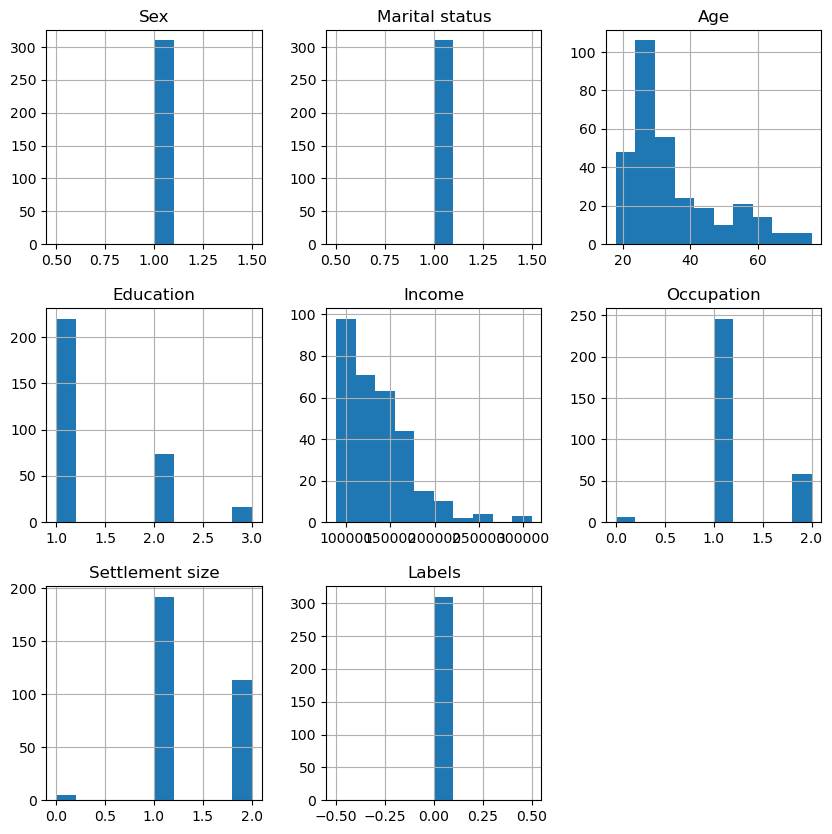

In [113]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,10));

#### Conclusão Cluster 0:

Este cluster agrupa mulheres, não solteiras com renda média, geralmente empregados, que vivem em cidades médias e grandes. Poderíamos ser tentados a dizer que sua idade está entre 20 e 40 anos principalmente ou que a educação é geralmente nível de ensino médio ou abaixo, mas como veremos mais adiante na análise, isso acontece em outros clusters também, então concluímos que idade ou educação são bons separadores de clusters neste conjunto de dados para os clusters 1 e 3.

### Cluster 3:

In [114]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,257.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,257.0,33.968872,10.759035,18.0,26.0,31.0,40.0,67.0
Education,257.0,1.268482,0.501851,1.0,1.0,1.0,1.0,3.0
Income,257.0,122976.723735,38529.241076,62263.0,96769.0,115369.0,146519.0,280570.0
Occupation,257.0,0.933852,0.630834,0.0,1.0,1.0,1.0,2.0
Settlement size,257.0,0.918288,0.827468,0.0,0.0,1.0,2.0,2.0
Labels,257.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


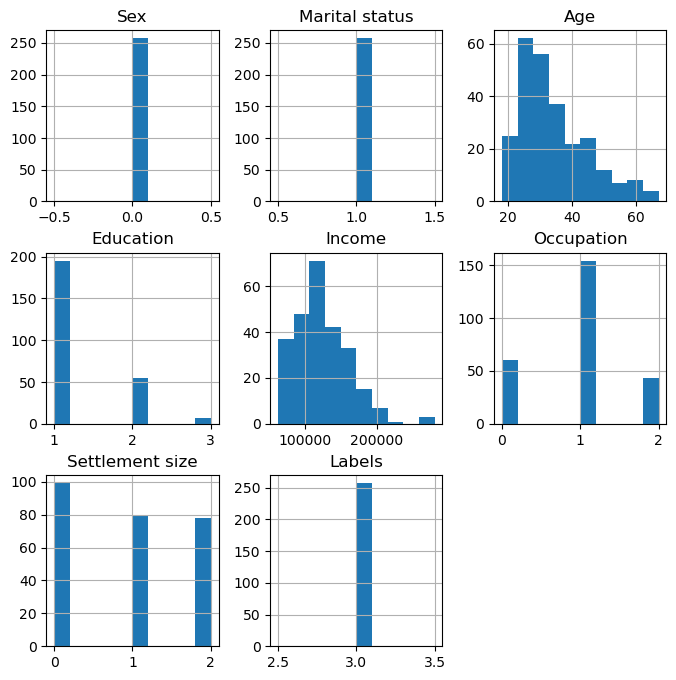

In [115]:
results_df[results_df['Labels'] == 3].hist(figsize=(8,8));

#### Conclusão do Cluster 3:

Homens, não solteiros, idade variando de 20 a 40 anos, predominantemente com ensino médio, renda em torno de 100000, empregado, trabalhando em cidades dos três portes 

### Cluster 1

In [116]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


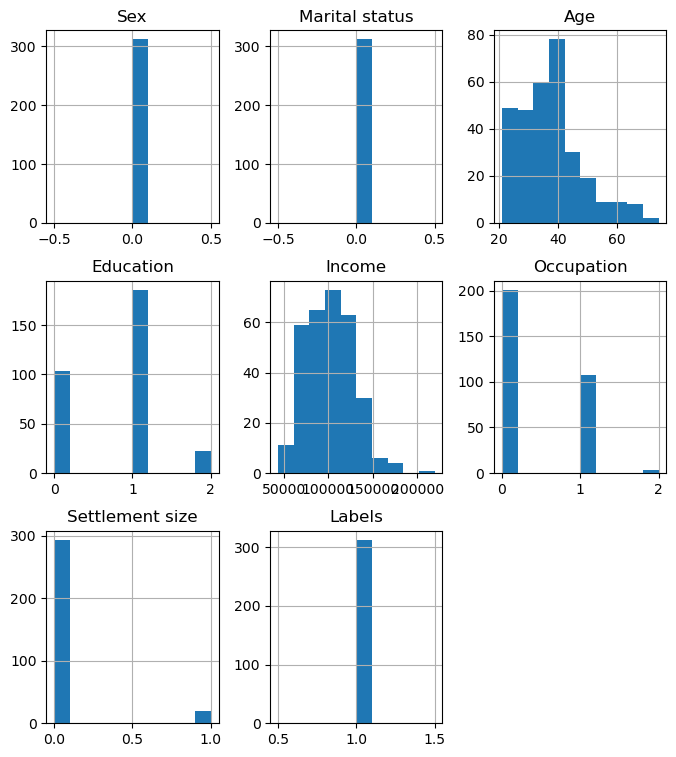

In [117]:
results_df[results_df['Labels'] == 1].hist(figsize=(8,9));

#### Conclusão Cluster 1

Este cluster é formado por homens, solteiros, com idade em torndo de 36 anos, majoritariamente com ensino médio ou não estudaram, sários em torno de 100000, principalmente não empregados, mas há alguns empregados.

### Cluster 2:

In [118]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,178.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,178.0,35.146067,9.755833,19.0,27.0,34.5,41.0,70.0
Education,178.0,0.932584,0.558403,0.0,1.0,1.0,1.0,3.0
Income,178.0,97997.241573,21702.050536,36760.0,80892.5,101511.0,113265.0,143321.0
Occupation,178.0,0.370787,0.507169,0.0,0.0,0.0,1.0,2.0
Settlement size,178.0,0.073034,0.260926,0.0,0.0,0.0,0.0,1.0
Labels,178.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


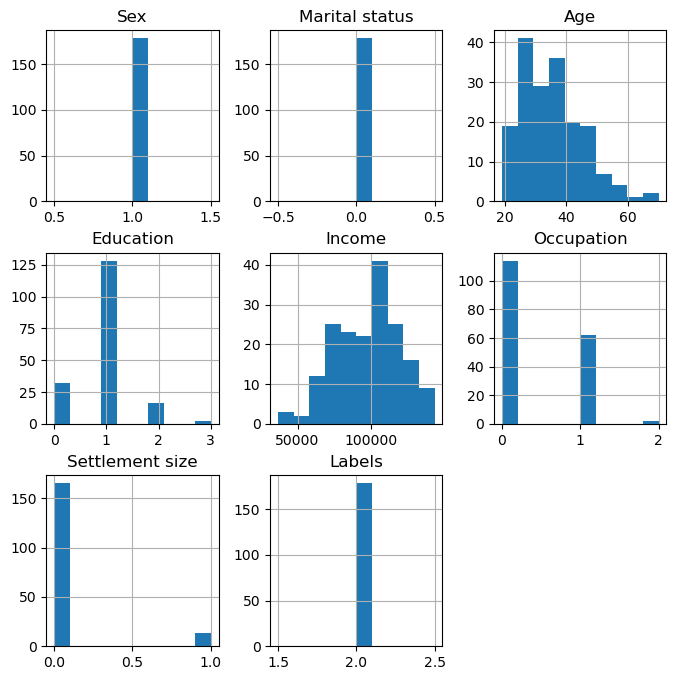

In [119]:
results_df[results_df['Labels'] == 2].hist(figsize=(8,8));
plt.savefig('cluster4_results')

#### Conclusões Cluster 2:

Mulheres, solteires, com idade bem distribuida, predominantemetne com ensino médio, com renda bem distribuida em torno de 100000, predominamente desempregadas e vivendo em cidades pequenas

In [120]:
from scipy.stats import ttest_ind
import numpy as np

age_cluster_0 = results_df[results_df['Labels'] == 0]['Age']
age_cluster_1 = results_df[results_df['Labels'] == 1]['Age']
age_cluster_2 = results_df[results_df['Labels'] == 2]['Age']
age_cluster_3 = results_df[results_df['Labels'] == 3]['Age']

first_clusters  = [1, 2]
second_clusters = [0, 3]
real_clusters = [age_cluster_0, age_cluster_1, age_cluster_2, age_cluster_3]

for num_clust_1 in first_clusters:
    for num_clust_2 in second_clusters:
        ttest,pval = ttest_ind(real_clusters[num_clust_1], real_clusters[num_clust_2])
        print(f'p-value of {num_clust_1} vs {num_clust_2} is:',pval)
        if pval <0.05:
            print("we reject null hypothesis")
        else:
            print("we accept null hypothesis")


p-value of 1 vs 0 is: 0.002366332631327293
we reject null hypothesis
p-value of 1 vs 3 is: 7.294408289265683e-05
we reject null hypothesis
p-value of 2 vs 0 is: 0.6478424447666542
we accept null hypothesis
p-value of 2 vs 3 is: 0.24458899894379485
we accept null hypothesis


### Cluster 4

In [121]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,426.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Marital status,426.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,426.0,32.150235,10.605036,18.0,25.00,28.0,36.0,71.0
Education,426.0,1.204225,0.463319,1.0,1.00,1.0,1.0,3.0
Income,426.0,101777.624413,25644.248228,35832.0,86182.25,102009.0,120226.5,207262.0
Occupation,426.0,0.431925,0.495927,0.0,0.00,0.0,1.0,1.0
Settlement size,426.0,0.002347,0.048450,0.0,0.00,0.0,0.0,1.0
Labels,426.0,4.000000,0.000000,4.0,4.00,4.0,4.0,4.0


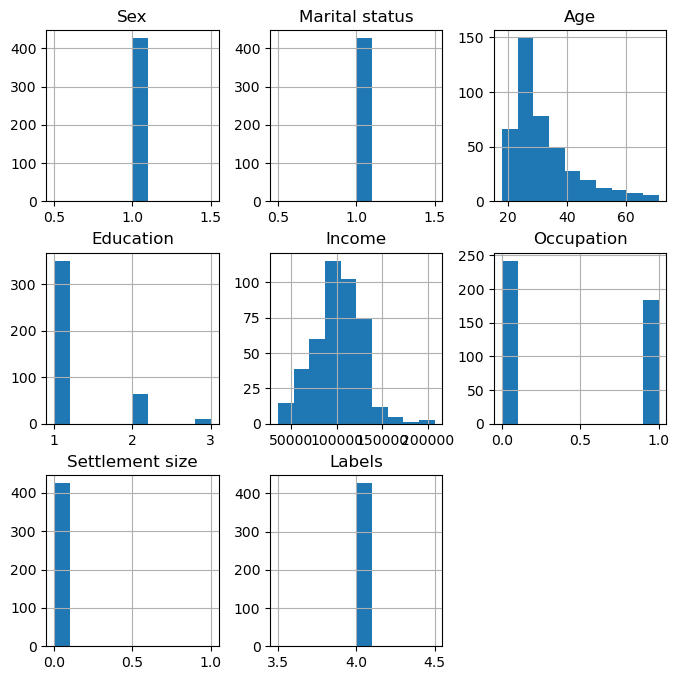

In [122]:
results_df[results_df['Labels'] == 4].hist(figsize=(8,8));

#### Conclusões Cluster 4:
Mulheres casadas, relativamente jovens, predominamente com ensino médio ou curso superior, com renda bem centrada em torno de 100000, ou desempregadas ou com cargos gerenciais ou autônomas, vivendo em cidades pequenas. 

### Cluster 5

In [123]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,517.0,40.001934,11.945532,20.0,31.0,37.0,47.0,75.0
Education,517.0,0.822050,0.612576,0.0,0.0,1.0,1.0,2.0
Income,517.0,145373.611219,38286.684815,82398.0,119276.0,136323.0,159757.0,287247.0
Occupation,517.0,1.266925,0.484577,0.0,1.0,1.0,2.0,2.0
Settlement size,517.0,1.529981,0.507283,0.0,1.0,2.0,2.0,2.0
Labels,517.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


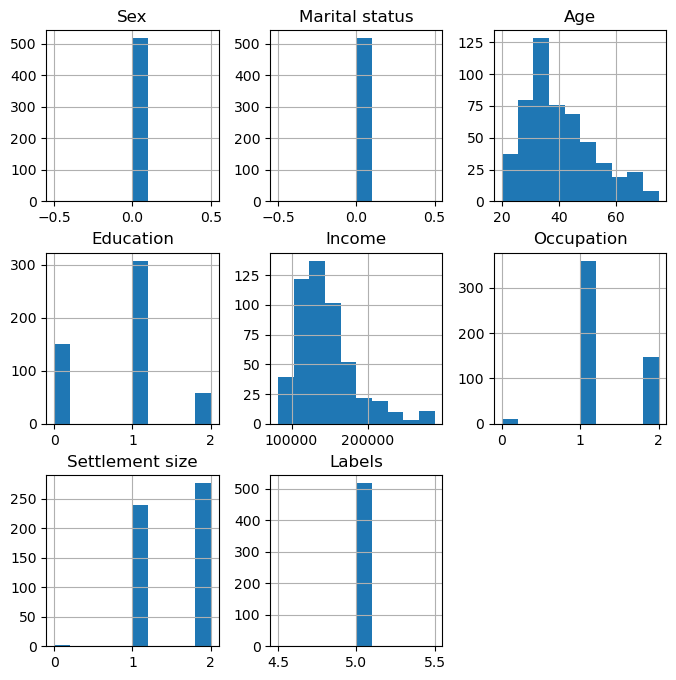

In [135]:
results_df[results_df['Labels'] == 5].hist(figsize=(8,8));

#### Conclusões Cluster 2:

O cluster 2 é representado por homens, solteiros, com idade variando bastante,  com ensino médio, predominantemente, mas também alguns sem ensiono e outros com curso superior, renda, em média, um pouco mais alta, empregados em sua maiora, mas também autônomos ou gerentes. Eless vivem em cidades médias a grandes.

## Formas alternativas de interpretar clusters:

### Usando centroides de cluster como um meio de entender os próprios clusters

Quando precisamos ter uma ideia rápida das estatísticas dos clusters por cluster, também podemos usar os centroides de cada cluster, como mostraremos abaixo. O problema com esse método é que ele fornece uma noção de tendência central, mas não conta a história toda. Outliers podem estar afetando os valores de cada centroide e, portanto, temos que lidar com essa métrica com cuidado.

No entanto, será uma boa medida de precisão de nossos clusters já criados.

In [136]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,1.000000e+00,1.000000e+00,0.447312,0.583871,0.674194,0.585498,0.410948
C1,-4.440892e-16,-1.110223e-16,0.245726,0.182692,0.030449,0.451144,0.484804
C2,1.000000e+00,-2.220446e-16,0.310861,0.185393,0.036517,0.433188,0.439125
C3,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C4,1.000000e+00,1.000000e+00,0.401408,0.215962,0.001174,0.447335,0.371443
C5,-5.551115e-16,5.551115e-16,0.274017,0.633462,0.764990,0.615822,0.524984


Você pode usar as informações no centroide para dar algum sentido aos dados, mas, assim como com as métricas de tendência central, você geralmente não ajustará suas descrições, pois os centroides não mostram necessariamente o quadro completo dos dados dentro de cada cluster. Você pode ver que o gênero e o estado civil da maioria dos clusters estarão corretos, mas as características numéricas e até mesmo algumas características categóricas são mais difíceis de interpretar. É por isso que preferimos o método Decision Tree mostrado abaixo.

### Árvore de decisão como um método para interpretar clusters:

Uma maneira alternativa de visualizar e entender clusters é por meio do uso de árvores de decisão. Podemos fazer uma árvore de decisão prever os rótulos de cada cluster que determinamos e, ao fazer isso, a árvore determinará pontos de divisão com base nos recursos que passamos para o modelo. Dessa forma, podemos criar as descrições do cluster com base em como a árvore de decisão divide os dados.

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [139]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [140]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

#### Avaliando o modelo para garantir que as interpretações sejam precisas:

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [142]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       0.96      1.00      0.98       312
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       426
           5       1.00      0.98      0.99       517

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



O modelo parece extremamente preciso na previsão dos valores das classes, então podemos esperar que os pontos de divisão sejam bastante precisos também. Prosseguiremos com a interpretação do modelo usando esta técnica.

### Visualização da Árvore de Clustering

A Árvore de Clustering auxilia na definição dos parâmetros do algoritmo de clustering e dá uma ideia de como os dados devem ser interpretados a partir dos nossos resultados. A árvore de clustering retorna os resultados mostrados abaixo, é importante observar que os clusters são nomeados na mesma ordem em que foram definidos nas seções anteriores.

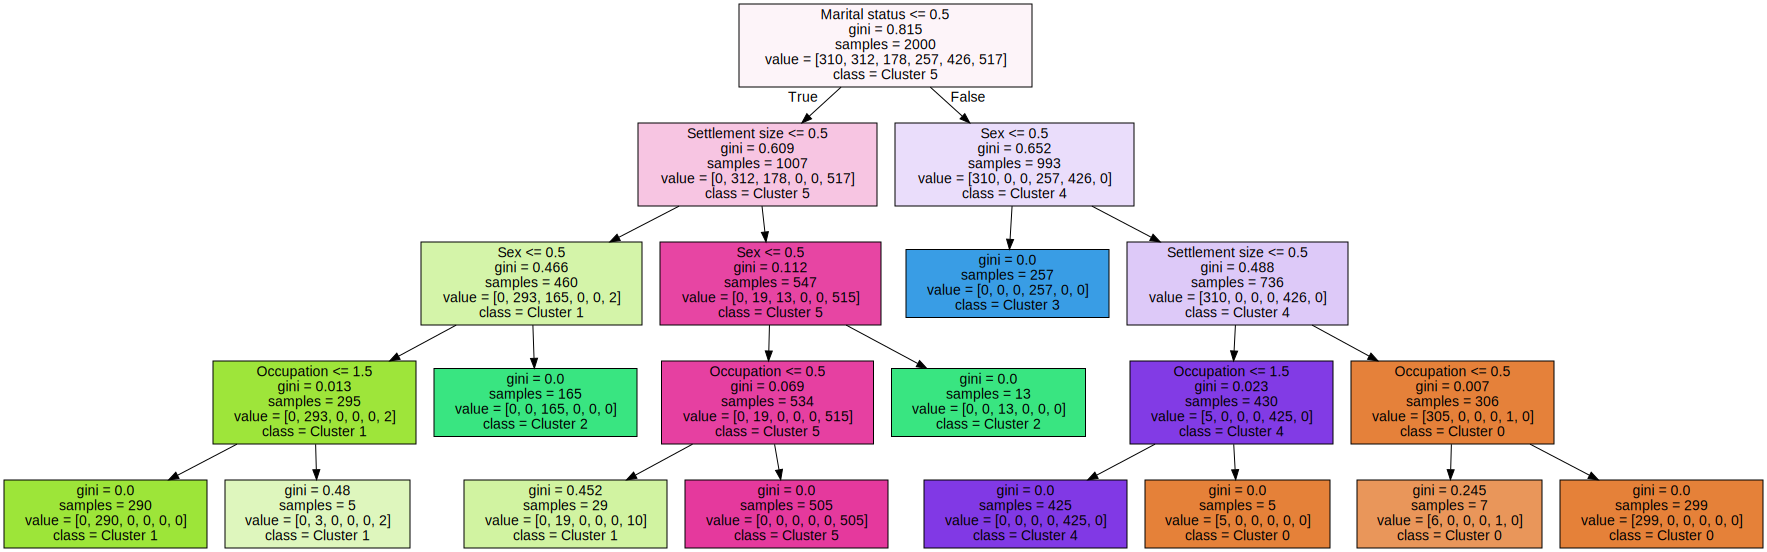

<Figure size 1000x1000 with 0 Axes>

In [144]:


# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#plt.savefig('DecisionTree.png')

### Clusters de acordo com a Árvore de Decisão:

Abaixo você pode ver a interpretação de cada cluster dependendo das características que separam os clientes em cada grupo. Você pode ver que, embora tenhamos usado métodos diferentes para obter as descrições de agrupamento, os resultados foram quase idênticos. O fato interessante sobre a Árvore de Decisão é que ela pode ser podada para levar em conta apenas as características mais importantes e, portanto, fornece uma versão muito mais simples que pode ser resumida melhor, como é feito abaixo. Ficaremos com os clusters obtidos por este método pelos motivos explicados antes.

Observe que há clusters como o número 4, onde você só precisa saber 2 características sobre o cliente para agrupá-los no cluster 4. Esta é uma regra muito simples de usar na prática.

## Relatório Final: Segmentação de Clientes com Clustering para a Secretaria de Educação do Espírito Santo

---

### **1. Introdução**  
Este relatório descreve a aplicação de técnicas de *clustering* (agrupamento) para segmentar clientes de um shopping, com o objetivo de extrair insights que possam ser adaptados para políticas educacionais pela Secretaria de Educação do Espírito Santo. O modelo utilizado foi o **K-Means**, e as etapas incluíram análise exploratória de dados (EDA), transformação de variáveis, seleção de clusters e interpretação dos resultados.  

#### Pontos principais

Aqui está uma versão mais resumida e objetiva dos principais resultados desta análise de segmentação de clientes:

*   **Objetivo:** Realizar a segmentação de clientes para obter *insights* de negócios.
*   **Metodologia:** Foi aplicado o algoritmo de *clustering* K-Means após etapas de limpeza, exploração e transformação dos dados.
*   **Número de Clusters:** A análise através do método do cotovelo e das pontuações de *Silhouette* sugeriu **6 ou 7 clusters** como ideais, sendo escolhido o número de **6 clusters** para a análise final.
*   **Transformação de Dados:** As variáveis numéricas 'Renda' e 'Idade' apresentaram distribuição não normal e foram transformadas utilizando as técnicas de transformação Logarítmica e *PowerTransformer* para se aproximarem da normalidade. Os atributos foram posteriormente escalados utilizando *MinMaxScaler*.
*   **Visualização:** A técnica de Análise de Componentes Principais (PCA) foi utilizada para reduzir a dimensionalidade dos dados e visualizar os clusters em um espaço tridimensional, embora essa redução implique em perda de informação.
*   **Interpretação dos Clusters:** Foram utilizadas estatísticas descritivas, centroides dos clusters e, principalmente, uma **Árvore de Decisão** para interpretar as características de cada um dos 6 *clusters* identificados. A alta precisão da árvore de decisão na previsão dos rótulos dos *clusters* validou a interpretação das suas características.
*   **Principais Características dos Clusters (conforme a Árvore de Decisão e as análises estatísticas):**
    *   **Cluster 0:** Principalmente **mulheres, não solteiras**, com renda média, geralmente **empregadas**, vivendo em cidades médias e grandes.
    *   **Cluster 1:** Principalmente **homens, solteiros**, com idade em torno de 36 anos, majoritariamente com **ensino médio ou sem educação**, renda em torno de 100000, principalmente **não empregados** (mas com alguns empregados).
    *   **Cluster 2:** Principalmente **mulheres, solteiras**, com idade bem distribuída, predominantemente com **ensino médio**, com renda bem distribuída em torno de 100000, predominantemente **desempregadas** e vivendo em cidades pequenas.
    *   **Cluster 3:** **Homens, não solteiros**, idade variando de 20 a 40 anos, predominantemente com **ensino médio**, renda em torno de 100000, **empregados**, trabalhando em cidades de todos os portes.
    *   **Cluster 4:** **Mulheres casadas**, relativamente jovens, predominantemente com **ensino médio ou curso superior**, com renda bem centrada em torno de 100000, ou **desempregadas ou com cargos gerenciais/autônomas**, vivendo em cidades pequenas.
    *   **Cluster 5:** **Homens, solteiros**, com idade variando bastante, predominantemente com **ensino médio**, mas também alguns sem ensino e outros com curso superior, renda, em média, um pouco mais alta, **empregados** em sua maioria (mas também autônomos ou gerentes), e vivendo em cidades médias a grandes.
*   **Conclusão:** A análise identificou seis segmentos de clientes distintos com características demográficas e socioeconômicas específicas, que podem ser úteis para direcionar estratégias de negócios. A Árvore de Decisão se mostrou uma ferramenta eficaz para resumir e interpretar as características chave de cada *cluster*.

---

### **2. Metodologia**  

#### **2.1 Base de Dados**  
- **Dataset**: 2.000 registros com 8 variáveis:  
  - **Numéricas**: ID, Idade (`Age`), Renda anual (`Income`).  
  - **Categóricas**: Sexo (`Sex`), Estado Civil (`Marital status`), Educação (`Education`), Ocupação (`Occupation`), Tamanho da cidade (`Settlement size`).  

#### **2.2 Análise Exploratória (EDA)**  
- **Distribuições**:  
  - `Income` e `Age` apresentaram assimetria à direita.  
  - Variáveis categóricas como `Education` mostraram predominância de ensino médio.  
- **Correlações**:  
  - Correlação positiva fraca entre `Age` e `Income` (\(r = 0,34\)).  
  - Educação e ocupação foram os fatores mais determinantes para a renda.  

#### **2.3 Pré-processamento**  
- **Transformações**:  
  - Aplicação de **PowerTransformer** e **log-transform** para normalizar `Income` e `Age`, embora os testes de normalidade (\(p < 0,05\)) indicassem que os dados não se tornaram totalmente normais.  
  - Padronização com **MinMaxScaler** para garantir escalas compatíveis com o K-Means.  

#### **2.4 Modelagem: K-Means Clustering**  
- **Seleção do Número de Clusters**:  
  - **Método do Cotovelo**: Sugeriu 6-7 clusters.  
  - **Silhouette Score**: Confirmou **7 clusters** como a melhor opção (pontuação média de 0,45).  
- **Redução de Dimensionalidade**:  
  - **PCA** foi aplicado para visualização tridimensional dos clusters.  

---

### **3. Resultados e Interpretação dos Clusters**  
Foram identificados **6 clusters** com características distintas:  

| **Cluster** | **Perfil** |  
|-------------|------------|  
| **0** | Mulheres casadas, renda média-alta, empregadas, vivendo em cidades médias/grandes. |  
| **1** | Homens solteiros, ensino médio, renda moderada, desempregados ou autônomos. |  
| **2** | Mulheres solteiras, renda média, predominantemente desempregadas, em cidades pequenas. |  
| **3** | Homens casados, ensino médio, renda média, empregados em cidades de todos os portes. |  
| **4** | Mulheres casadas jovens, renda média-baixa, desempregadas ou autônomas, em cidades pequenas. |  
| **5** | Homens solteiros, alta renda, ensino superior, empregados em cidades grandes. |  

#### **Insights Principais**:  
1. **Educação e Renda**: Clusters com maior nível educacional (ex: Cluster 5) apresentaram rendas mais altas.  
2. **Gênero e Ocupação**: Homens têm maior participação em cargos formais, enquanto mulheres estão mais associadas a desemprego ou trabalhos autônomos.  
3. **Tamanho da Cidade**: Cidades grandes concentram indivíduos com maior renda e educação.  

---

### **4. Validação do Modelo**  
- **Árvore de Decisão**:  
  - Classificou os clusters com **99% de precisão**, validando a coerência dos grupos.  
  - Regras de divisão destacaram **educação**, **ocupação** e **renda** como variáveis-chave.  

---

### **5. Sugestão de aplicação**
Sugestão de aplicações das metodologias aplicadas na Secretaria de Educação do Espírito Santo: A metodologia de segmentação de clientes pode ser adaptada para diversas finalidades na área da educação, como:

*   Segmentar alunos com base em características socioeconômicas, desempenho acadêmico ou necessidades educacionais específicas para direcionar intervenções e recursos de forma mais eficaz.
*   Identificar perfis de evasão escolar para implementar estratégias de retenção direcionadas.
*   Agrupar escolas com características semelhantes para comparar resultados e identificar boas práticas.

A aplicação direta dos clusters identificados neste estudo específico (baseado em clientes de um shopping center) para a Secretaria de Educação exigiria uma adaptação do modelo com dados relevantes do contexto educacional.

---

### **5. Conclusão**  
O modelo de clustering permitiu identificar padrões socioeconômicos e demográficos críticos. Para a Secretaria de Educação, esses resultados oferecem uma base quantitativa para direcionar políticas públicas, reduzir desigualdades e promover inclusão educacional e profissional. A replicação dessa metodologia em dados educacionais (ex: desempenho escolar, evasão) pode gerar insights ainda mais específicos para o estado do Espírito Santo.  

---  

**Equipe**: Sandro Ricardo De Souza e Leonardo  
**Orientador**: Prof. Sérgio Nery Simões  
**Data**: 28 de março de 2025